In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [25]:
def generate_permutations(numbers):
    digits = np.arange(1, numbers + 1)

    def backtrack(current_permutation):
        if len(current_permutation) == len(digits):
            permutations.append(current_permutation[:])
        else:
            for digit in digits:
                if digit not in current_permutation:
                    current_permutation.append(digit)
                    backtrack(current_permutation)
                    current_permutation.pop()

    permutations = []
    backtrack([])
    return permutations


# Пример использования:


def count_smaller_elements(matrix, skip_numbers, numbers_choices):
    result_massive = []

    for row in matrix:  # Перебираем каждую строку в двумерном массиве
        prev_num = row[skip_numbers - 1]
        i = skip_numbers
        while row[i] > prev_num and i < numbers_choices - 1:
            prev_num = row[i]
            i += 1
        else:
            result_massive.append(row[i])

    return result_massive


def count_min_max(arr):
    if not arr:
        return {'max': 0, 'min': 0}

    min_val = min(arr)
    max_val = max(arr)
    length_massive = len(arr)
    min_count = arr.count(min_val)
    max_count = arr.count(max_val)
    best_choice = arr.count(min_val) / length_massive
    worst_choice = arr.count(max_val) / length_massive

    result_dictionary = {'min count': min_count, 'max count': max_count, 'worst choice': worst_choice,
                         'best choice': best_choice}
    return result_dictionary


massive_worst_choice = [[] for _ in range(10 - 3)]
massive_best_choice = [[] for _ in range(10 - 3)]
for numbers in tqdm(range(3, 10)):
    input_arr = generate_permutations(numbers)
    for skip_number in range(3, numbers + 1):
        result_massive = count_smaller_elements(input_arr, skip_number - 2, numbers)
        result_dict = count_min_max(result_massive)
        result_dict['skip_number'] = skip_number - 2
        massive_worst_choice[skip_number - 3].append(result_dict['worst choice'])
        massive_best_choice[skip_number - 3].append(result_dict['best choice'])

100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.46it/s]


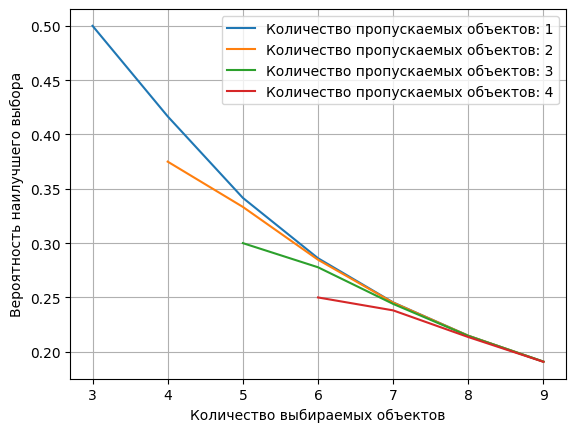

In [30]:
plt.grid()
plt.xlabel('Количество выбираемых объектов')
plt.ylabel('Вероятность наилучшего выбора')
plt.plot(np.arange(3, 10), massive_best_choice[0],label='Количество пропускаемых объектов: 1')
plt.plot(np.arange(4, 10), massive_best_choice[1],label='Количество пропускаемых объектов: 2')
plt.plot(np.arange(5, 10), massive_best_choice[2],label='Количество пропускаемых объектов: 3')
plt.plot(np.arange(6, 10), massive_best_choice[3],label='Количество пропускаемых объектов: 4')
plt.legend()

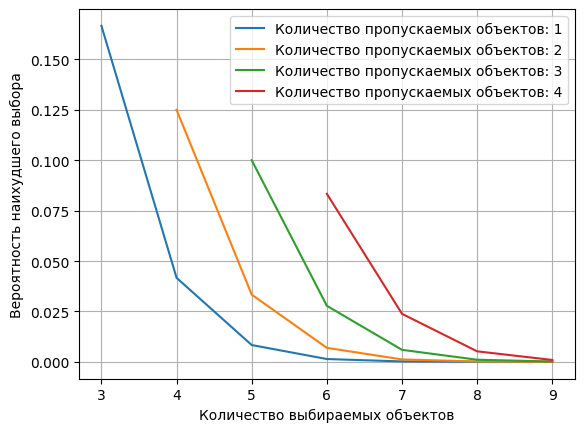

In [31]:
plt.grid()
plt.xlabel('Количество выбираемых объектов')
plt.ylabel('Вероятность наихудшего выбора')
plt.plot(np.arange(3, 10), massive_worst_choice[0],label='Количество пропускаемых объектов: 1')
plt.plot(np.arange(4, 10), massive_worst_choice[1],label='Количество пропускаемых объектов: 2')
plt.plot(np.arange(5, 10), massive_worst_choice[2],label='Количество пропускаемых объектов: 3')
plt.plot(np.arange(6, 10), massive_worst_choice[3],label='Количество пропускаемых объектов: 4')
plt.legend()